In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
out_final_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\journal+doi+abstract+year+citation+fieldofstudy_dropnull.csv"

with open(out_final_p, 'r', encoding = 'utf-8', newline = '') as f:    
    data = pd.read_csv(f)

print('Number of null data: \n ', data.isnull().sum())

Number of null data: 
  Unnamed: 0          0
title               0
authors             0
venue               0
year                0
citationCount       0
fieldsOfStudy       0
abstract            0
doi                 0
query               0
database            0
publication_type    0
dtype: int64


# Year
'year'

2021    1716
2022    1119
2020     741
2019     462
2018     328
2017     239
2016     207
2015     189
2014     151
2013     139
2012     107
2010      97
2011      91
Name: year, dtype: int64


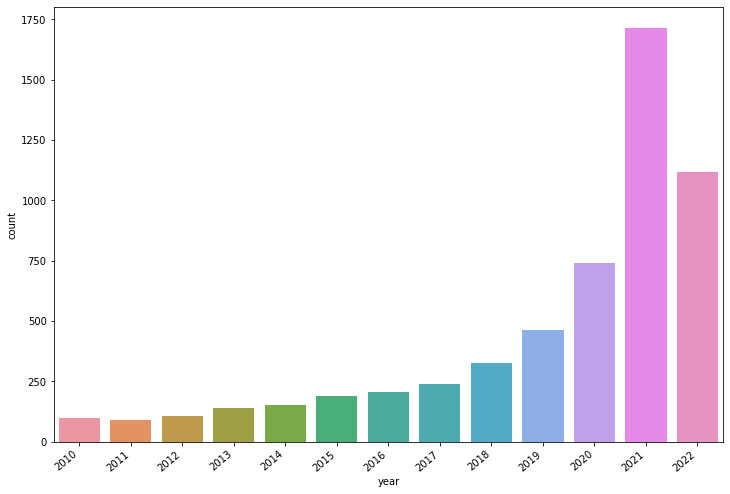

In [27]:
data['year'] = data['year'].astype('int32')
print(data['year'].value_counts())
plt.figure(figsize=(12,8))
sns.countplot(x='year', data=data)
plt.xticks(rotation = 40, ha = 'right')
plt.show()

# Query distribution

misinformation    1498
rumor             1242
spam               807
disinformation     782
troll              677
fake+news          580
Name: query, dtype: int64


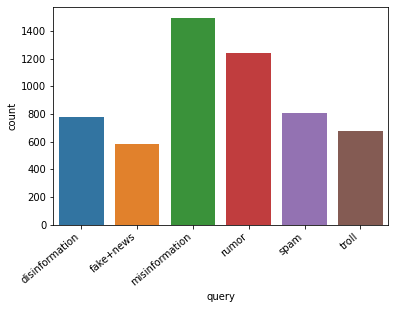

In [7]:
data['query'] = data['query'].replace('Spam', 'spam') # I forgot to normalize this bf
print(data['query'].value_counts())
sns.countplot(x='query', data=data)
plt.xticks(rotation = 40, ha = 'right')
plt.show()

# Database distribution

wos               2715
scopus            1589
science_direct    1282
Name: database, dtype: int64


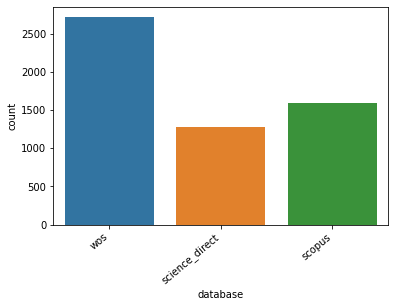

In [8]:
print(data['database'].value_counts())
sns.countplot(x='database', data=data)
plt.xticks(rotation = 40, ha = 'right')
plt.show()

# Field of study
'fieldsOfStudy'

In [9]:

count_multi = 0
all_fieldofstudy = []
for fields in data.fieldsOfStudy:
    fields = fields.replace(',', ';').replace("'", "").replace('[', '').replace(']', '')
    if len(fields.split(';'))>1:
        count_multi+=1
        all_fieldofstudy.extend(fields.split(';'))
    else:
        all_fieldofstudy.append(fields)
print(count_multi)

1278


In [18]:
all_fieldofstudy = [field.strip() for field in all_fieldofstudy]
count_fields = {}
for item in all_fieldofstudy:
    count_fields[item] = count_fields.get(item, 0)+1
len(count_fields)
sorted_count_fields = {k:v for k, v in sorted(count_fields.items(), key=lambda item: item[1], reverse=True) }
print('the number of fields of study: ', len(sorted_count_fields))
slice_count_fields = {k:v for k, v in sorted_count_fields.items() if v>5}
print('the number of fields > 5 frequences:  ', len(slice_count_fields))
slice_count_fields

the number of fields of study:  144
the number of fields > 5 frequences:   80


{'Medicine': 1508,
 'Computer Science': 1321,
 'Psychology': 546,
 'Communication': 419,
 'Engineering': 250,
 'Political Science': 226,
 'Sociology': 186,
 'Information Science & Library Science': 182,
 'Physics': 170,
 'Mathematics': 138,
 'Government & Law': 135,
 'Telecommunications': 122,
 'Business': 109,
 'Social Sciences - Other Topics': 104,
 'Business & Economics': 99,
 'Science & Technology - Other Topics': 99,
 'History': 93,
 'Environmental Sciences & Ecology': 83,
 'Public': 71,
 'Environmental & Occupational Health': 71,
 'Chemistry': 51,
 'International Relations': 50,
 'Operations Research & Management Science': 50,
 'Linguistics': 46,
 'Materials Science': 45,
 'Geography': 45,
 'Geology': 45,
 'Arts & Humanities - Other Topics': 44,
 'Economics': 41,
 'Education & Educational Research': 36,
 'Health Care Sciences & Services': 31,
 'General & Internal Medicine': 30,
 'Biology': 30,
 'Film': 25,
 'Radio & Television': 25,
 'Neurosciences & Neurology': 25,
 'Environment

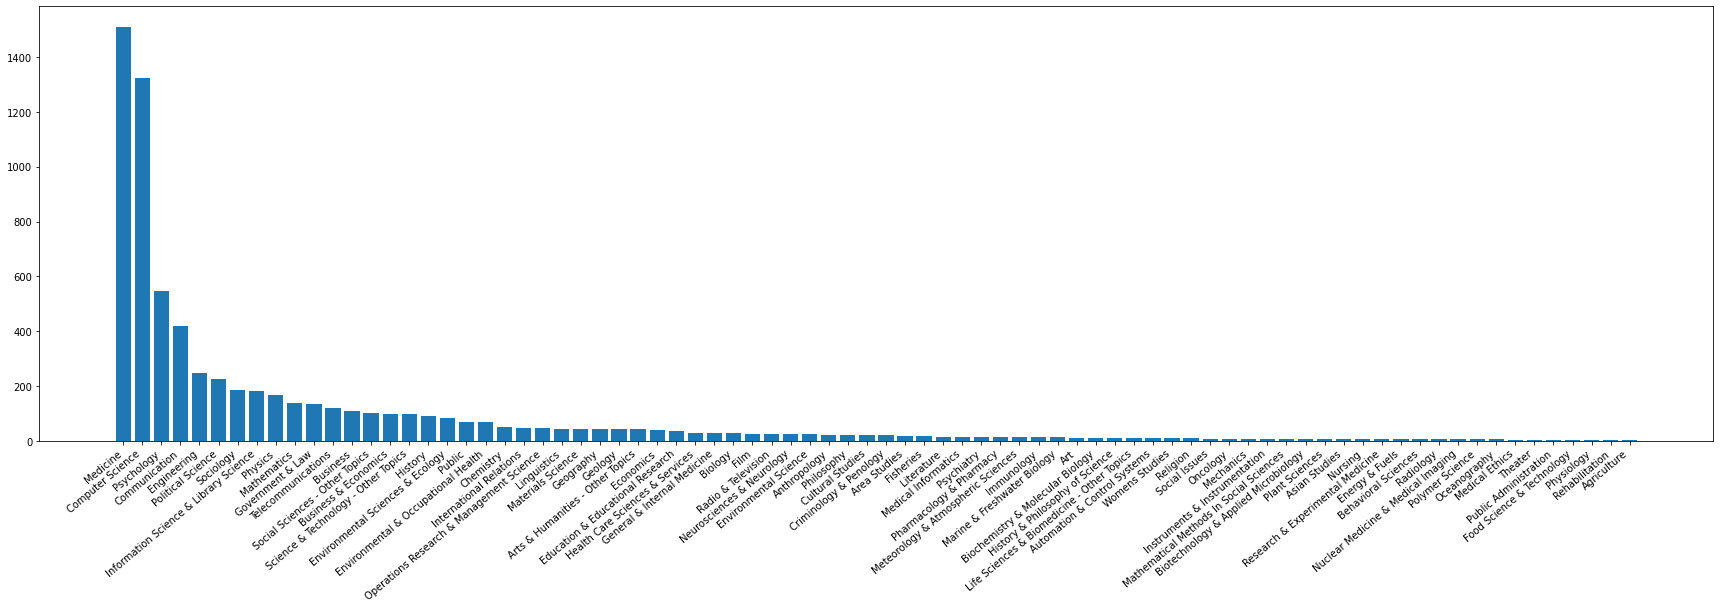

In [21]:
plt.figure(figsize=(30,8))
plt.bar(range(len(slice_count_fields)), list(slice_count_fields.values()), tick_label= list(slice_count_fields.keys()))
plt.xticks(rotation = 40, ha = 'right')
plt.tick_params(axis='both', which='minor', labelsize=4)
plt.show()

# Venue (journal) distribution

 the number of unique journal names:  2402

top 100 most frequent journal:
                                                venue  count
0                                         ieee access     83
1   international journal of environmental researc...     68
2                                             vaccine     65
3                                            plos one     58
4   physica a: statistical mechanics and its appli...     50
..                                                ...    ...
95  future generation computer systems-the interna...      8
96                            jmir formative research      8
97          journal of management information systems      8
98                     journal of affective disorders      8
99                              science communication      8

[100 rows x 2 columns]


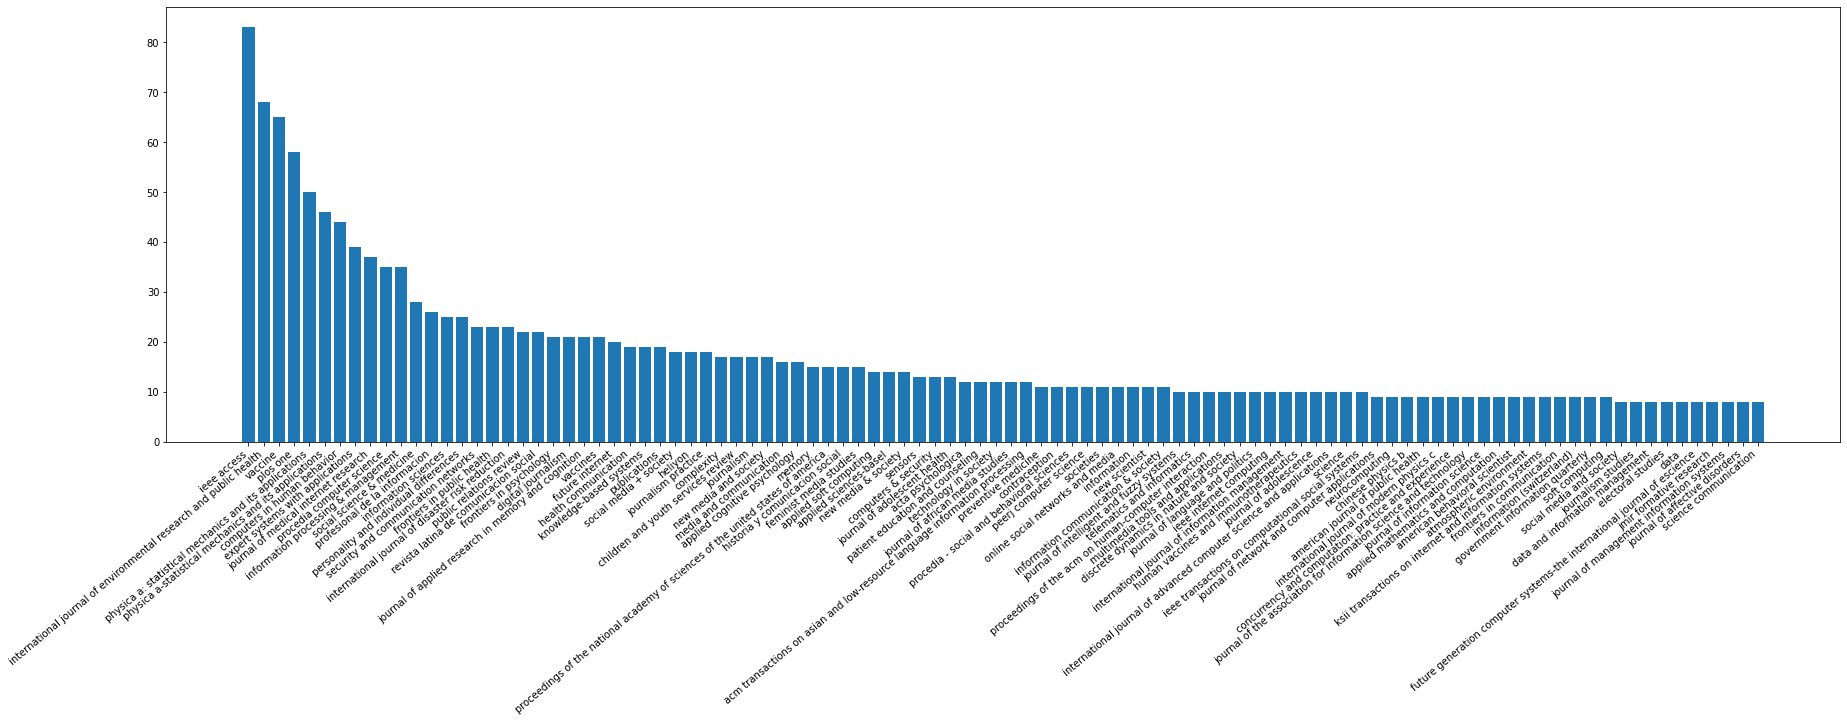

In [26]:
n = 100
venue_freq = pd.DataFrame(data['venue'].str.lower().value_counts().rename_axis('venue').reset_index(name='count'))
print(' the number of unique journal names: ', venue_freq.shape[0])
print('\ntop 100 most frequent journal:')
print(venue_freq[:n])

plt.figure(figsize=(30,8))
plt.bar(range(len(venue_freq[:n])), list(venue_freq['count'][:n]), tick_label= list(venue_freq['venue'][:n]))
plt.xticks(rotation = 40, ha = 'right')
plt.tick_params(axis='both', which='minor', labelsize=4)
plt.show()

# Citation count distribution

In [47]:
thresholds = [10, 30, 50, 100, 300, 500, 1000]
for threshold in thresholds:
    print(' >%s, there are %s papers.' %(str(threshold), str(data[data['citationCount']>threshold].shape[0])))



 >10, there are 1421 papers.
 >30, there are 499 papers.
 >50, there are 261 papers.
 >100, there are 94 papers.
 >300, there are 23 papers.
 >500, there are 12 papers.
 >1000, there are 3 papers.


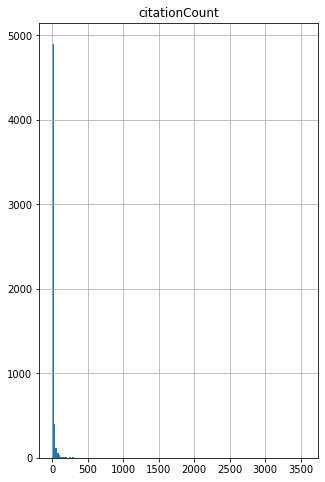

In [48]:
hist = data.hist(column = 'citationCount', bins=150, figsize=(5,8))
plt.show()